<br><br><center><h1 style="font-size:3em;color:#purple">World Development Indicators</h1></center>
<br>
<table>
<col width="560">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:560px;height:360px;"/></td>
<td>
Used an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

# Import libraries

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [7]:
# read the file
df = pd.read_csv('./data/Indicators.csv')
df.shape # find how large is the dataset and how many columns

(5656458, 6)

In [43]:
# Exploring the top 10 row
df.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


The dataset shows a four-dimensional dataset where the dimensions are; **country**,**indicator**, **year** and **value**.

#### How many unique country names are in this dataset?

In [9]:
countries = df['CountryName'].unique().tolist()


In [39]:
countries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [11]:
len(countries)

247

#### How Many country codes are there? 
*(Should be the same # as countries)*

In [12]:
country_codes = df['CountryCode'].unique().tolist()
len(country_codes)

247

#### How Many Unique indicators are there?

In [13]:
indicators = df['IndicatorName'].unique().tolist()
len(indicators)

1344

#### How many Years of data do we have?

In [14]:
years = df['Year'].unique().tolist()
len(years)

56

#### What is the range of years

In [16]:
print(min(years), "to", max(years))

1960 to 2015


## CO2 Emmission per capita in the USA

In [30]:
# CO2 emmision for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = df['IndicatorName'].str.contains(hist_indicator) 
mask2 = df['CountryCode'].str.contains(hist_country)

ind_mask_usa = df[mask1 & mask2]

In [31]:
ind_mask_usa.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Looking at how emmisions have changed over time in the USA

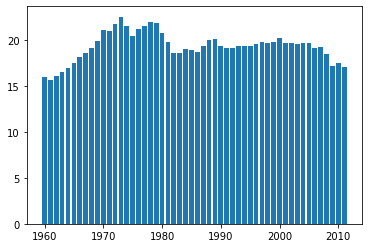

In [33]:
# getting the years
years = ind_mask_usa['Year'].values

# getting the values
co2_em = ind_mask_usa['Value'].values

# creating a bar plot
plt.bar(years, co2_em)
plt.show()

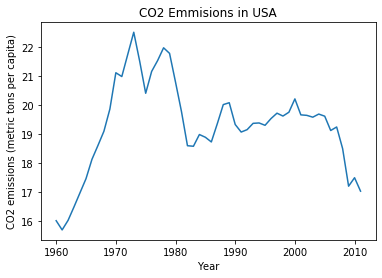

In [38]:
# creating a line plot
plt.plot(ind_mask_usa['Year'].values, ind_mask_usa['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(ind_mask_usa['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emmisions in USA')

#start the y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()


This chart can be misleading because its starting at 15 instead of 0

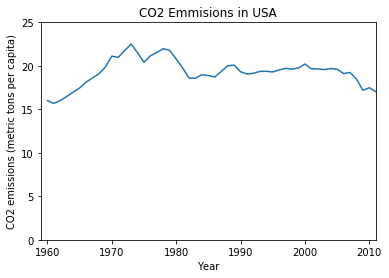

In [108]:
# creating a line plot
plt.plot(ind_mask_usa['Year'].values, ind_mask_usa['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(ind_mask_usa['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emmisions in USA')

#start the y axis at 0
plt.axis([1959, 2011,0,25])

plt.show()


In [116]:
hist_data = ind_mask_usa['Value'].values

In [117]:
print(len(ind_mask_usa))

52


## Using Histograms to explore the distribution of values
We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year. 

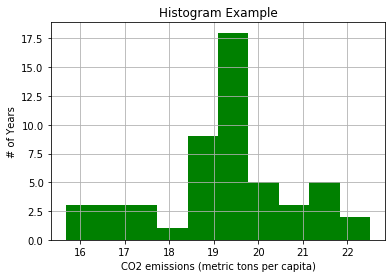

In [120]:
# The histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(ind_mask_usa['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

USA has many years where it produced between 19-20 metric tons per capita with outliers on the side

## USA CO2 Emision to the rest of the world?

In [126]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask_1 = df['IndicatorName'].str.contains(hist_indicator) 
mask_2 = df['Year'].isin([hist_year])

# applying the mask
co2_2011 = df[mask_1 & mask_2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [150]:
# How many Countries in 2011 gave CO2 data
print(len(co2_2011))

232


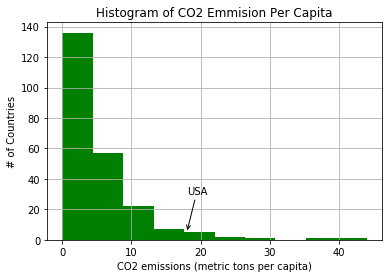

In [153]:
# Let's plot a histogram of the emmisions per capita by country

# subplots return a tuple with the figure, axis attributes
fig, ax = plt.subplots()

ax.annotate('USA',
           xy=(18,5), xycoords='data',
            xytext=(18,30), textcoords='data',
            arrowprops=dict(arrowstyle='->',
                           connectionstyle='arc3'),
            
            )

plt.hist(co2_2011["Value"], 10, density=False, facecolor='green')

plt.xlabel(ind_mask_usa["IndicatorName"].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emmision Per Capita')

# plt.axis([10,22,0,14])
plt.grid(True)

plt.show()


So the USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

## Let's dig into the outliers at 40 metric tons per capita

In [227]:
df.nlargest(10,'Value')

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5586589,"Iran, Islamic Rep.",IRN,GDP (current LCU),NY.GDP.MKTP.CN,2014,1.103367e+16
5586637,"Iran, Islamic Rep.",IRN,Gross value added at factor cost (current LCU),NY.GDP.FCST.CN,2014,1.080748e+16
5586015,Indonesia,IDN,Gross national expenditure (current LCU),NE.DAB.TOTL.CN,2014,1.062202e+16
5585958,Indonesia,IDN,GDP (current LCU),NY.GDP.MKTP.CN,2014,1.054269e+16
5586632,"Iran, Islamic Rep.",IRN,Gross national expenditure (current LCU),NE.DAB.TOTL.CN,2014,1.045169e+16
5586023,Indonesia,IDN,Gross value added at factor cost (current LCU),NY.GDP.FCST.CN,2014,1.027922e+16
5585981,Indonesia,IDN,GNI (current LCU),NY.GNP.MKTP.CN,2014,1.021258e+16
5453989,Indonesia,IDN,Gross national expenditure (current LCU),NE.DAB.TOTL.CN,2013,9.600188e+15
5453923,Indonesia,IDN,GDP (current LCU),NY.GDP.MKTP.CN,2013,9.524736e+15
5454809,"Iran, Islamic Rep.",IRN,GNI (current LCU),NY.GNP.MKTP.CN,2013,9.443871e+15


## GPD in USA over time

In [174]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = df['IndicatorName'].str.contains(hist_indicator) 
mask2 = df['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and GDP per capita over time.
gdp_stage = df[mask1 & mask2]

#plot gdp_stage vs ind_mask_usa

In [176]:
gdp_stage.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657
77142,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,16276.426685


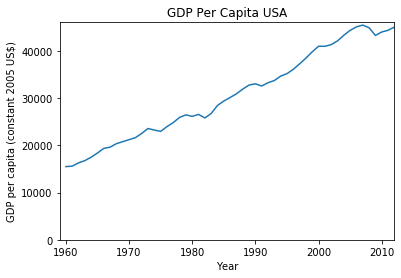

In [177]:
# create line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2012,0,46000])

plt.show()

### Using a histogram to display gdp in USA

In [178]:
hist_data = gdp_stage['Value'].values

In [179]:
len(hist_data)

55

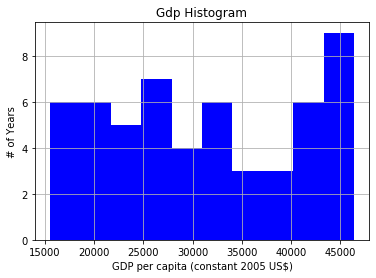

In [180]:
# The histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='blue')

plt.xlabel(gdp_stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Gdp Histogram')

plt.grid(True)
plt.show()

## CO2 Emmission per capita in the Kenya

In [215]:
# select CO2 emissions for Kenya
hist_indicator = 'CO2 emissions \(metric'
hist_countr_ke = 'Kenya'

maske_1 = df['IndicatorName'].str.contains(hist_indicator) 
maske_2 = df['CountryName'].str.contains(hist_countr_ke)

# applying the mask
kenya_co2 = df[maske_1 & maske_2]
kenya_co2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
13098,Kenya,KEN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.299497
38228,Kenya,KEN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.287257
65867,Kenya,KEN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.304274
94374,Kenya,KEN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.320662
123169,Kenya,KEN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.307305


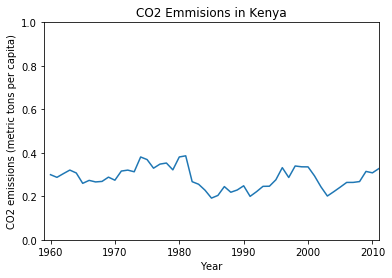

In [133]:
# creating a line plot
plt.plot(kenya_co2['Year'].values, kenya_co2['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(kenya_co2['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emmisions in Kenya')

#start the y axis at 0
plt.axis([1959, 2011,0,1])

plt.show()

In [172]:
len(kenya_co2)

52

## Kenya Gdp over time

In [216]:
# select GDP Per capita for the Kenya
hist_indicator = 'GDP per capita \(constant 2005'
hist_countr_ke = 'Kenya'

maske_3 = df['IndicatorName'].str.contains(hist_indicator) 
maske_4 = df['CountryName'].str.contains(hist_countr_ke)


# stage is just those indicators matching the Kenya for country code and GDP per capita over time.
gdp_ke = df[maske_3 & maske_4]
gdp_ke.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
13130,Kenya,KEN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,322.102943
38265,Kenya,KEN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,287.965520
65904,Kenya,KEN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,305.427070
94412,Kenya,KEN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,321.816373
123211,Kenya,KEN,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,327.081578


In [217]:
len(gdp_ke)

55

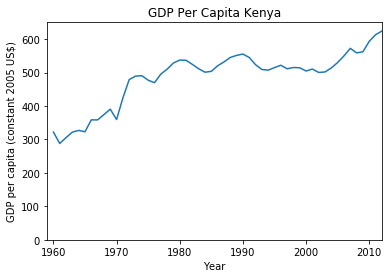

In [219]:
# create line plot
plt.plot(gdp_ke['Year'].values, gdp_ke['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_ke['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita Kenya')

# to make more honest, start they y axis at 0
plt.axis([1959, 2012,0,650])

plt.show()

### CO2 Emmission per capita in the China

In [138]:
hist_indicator = 'CO2 emissions \(metric'
hist_countr_ch = 'China'

maskch_1 = df['IndicatorName'].str.contains(hist_indicator) 
maskch_2 = df['CountryName'].str.contains(hist_countr_ch)

# applying the mask
china_co2 = df[maskch_1 & maskch_2]
china_co2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7160,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.170381
11224,"Hong Kong SAR, China",HKG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.960982
14272,"Macao SAR, China",MAC,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.299424
31454,China,CHN,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.836047
36124,"Hong Kong SAR, China",HKG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.064878


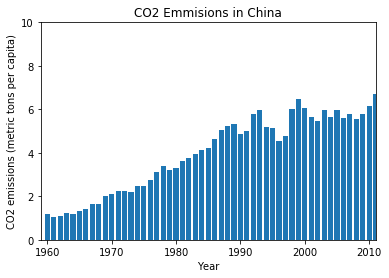

In [165]:
# creating a line plot
plt.bar(china_co2['Year'].values, china_co2['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(china_co2['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emmisions in China')

#start the y axis at 0
plt.axis([1959, 2011,0,10])

plt.show()

### Looking at how adolescent fertility rate changed over time in the Kenya

In [106]:
# select CO2 emissions for the United States
adol_indicator = 'Adolescent fertility rate \(births'
name_country = 'Kenya'

mask_ke1 = df['IndicatorName'].str.contains(hist_indicator) 
mask_ke2 = df['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the Kenya for country code and CO2 emissions over time.
indic_ke_adol = df[mask_ke1 & mask_ke2]

In [145]:
# select CO2 emissions for Kenya
hist_indicator = 'Adolescent fertility rate \(births'
hist_countr_ke = 'Kenya'

mask_ke1 = df['IndicatorName'].str.contains(hist_indicator) 
mask_ke2 = df['CountryName'].str.contains(hist_countr_ke)

# applying the mask
kenya_adol_fert = df[mask_ke1 & mask_ke2]
kenya_adol_fert.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
13088,Kenya,KEN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,179.7378
38209,Kenya,KEN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,181.0034
65847,Kenya,KEN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1962,182.2690
94354,Kenya,KEN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1963,182.4724
123144,Kenya,KEN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1964,182.6758


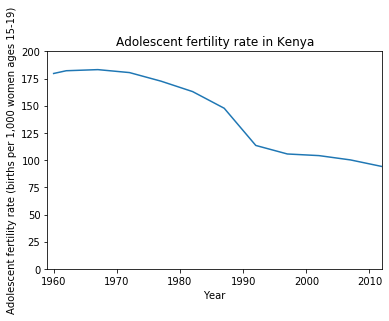

In [149]:
# creating a line plot
plt.plot(kenya_adol_fert['Year'].values, kenya_adol_fert['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(kenya_adol_fert['IndicatorName'].iloc[0])

# label the figure
plt.title('Adolescent fertility rate in Kenya')

#start the y axis at 0
plt.axis([1959, 2012,0,200])

plt.show()

In [183]:
kenya = df.loc[(df['CountryName'] == 'Kenya')]

In [220]:
kenya.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
13088,Kenya,KEN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,179.737800
13089,Kenya,KEN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,100.464320
13090,Kenya,KEN,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,7.371888
